<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


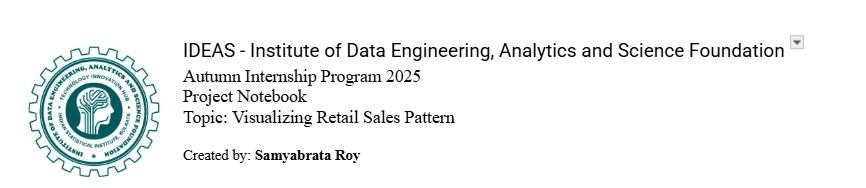

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

Time-Series data is what is recorded over time for example can be average height of people over a time period the changes of the different people over years can be interesting. Almost all data that has that varies over a period of time.Ex:- Stock,prices of currency etc.

Python programming language is powerful and you can use multiple libraries to analyse the data,to visualise the data,to build models to predict values.

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [7]:
# Replace with your Google Drive file ID which has public view access
file_id = "1UvyaVuu4Exch1NEfqG9gUjF4EIUGeapB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv("retail_sales_dataset.csv", sep=",", quotechar='"', engine="python", on_bad_lines="skip")

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

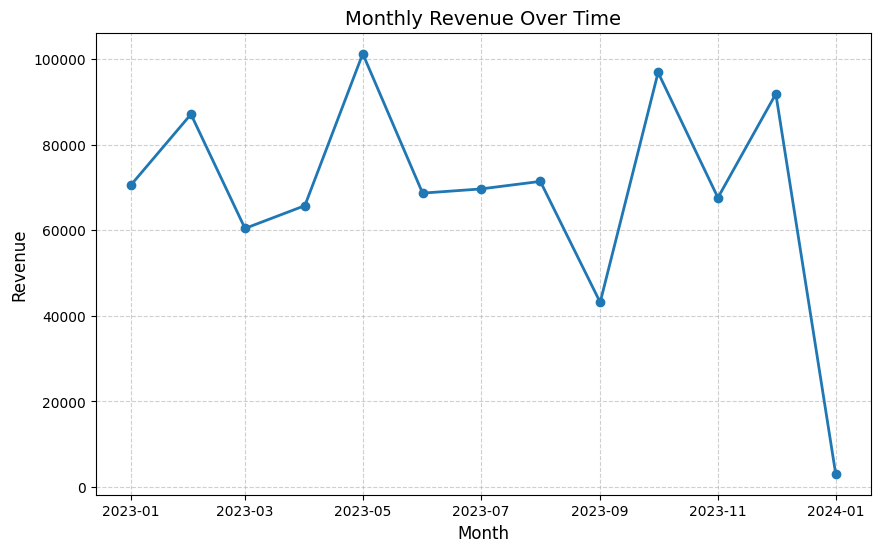

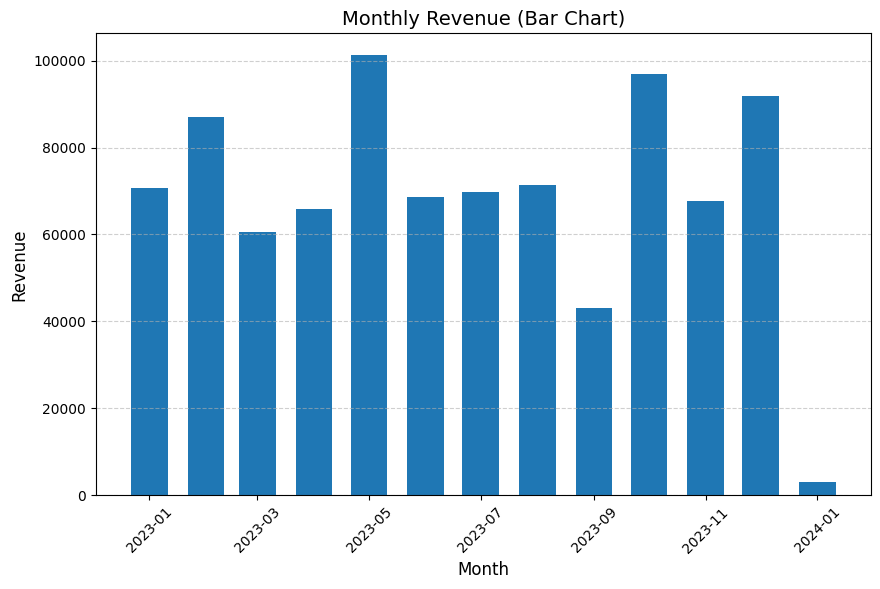

In [8]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?

Q. What are your key takeaways?

The highest revenue generating month is May genarating revenue of 1 lakh. There is no particular trend monthly but there have been sharp increses in the month of May and October highlighting the usual festive season in october and holidays in may But they drop sharply after december highlighting the onset of winter.




---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


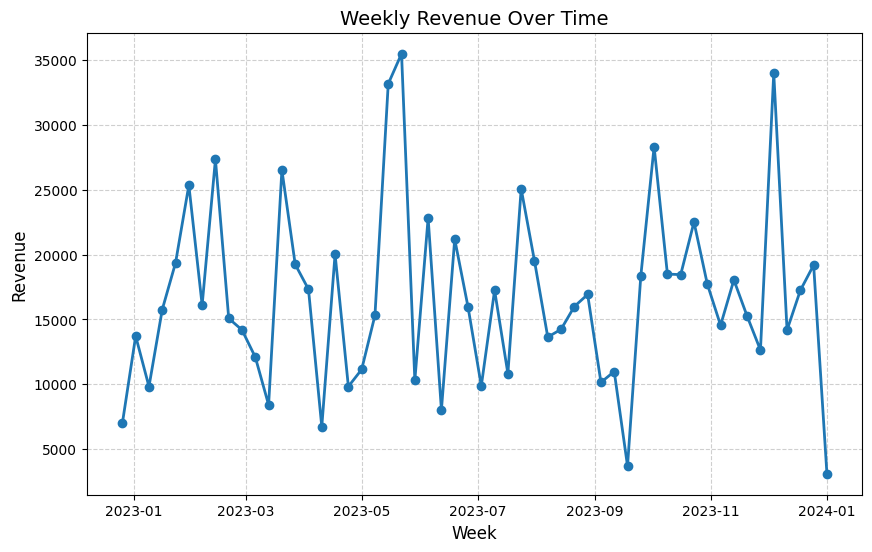

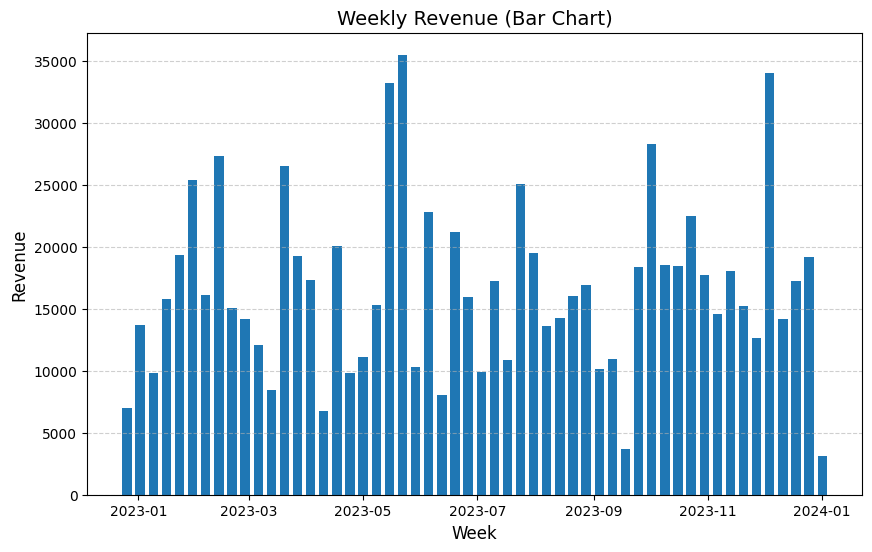

In [14]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Week and calculate total revenue
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', linewidth=2)
plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(weekly_revenue.index, weekly_revenue.values, width=5)  # ~5 days for weekly spacing
plt.title("Weekly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

The above trends depicted in the monthly trend is depicted in almost similar manner here,But the difference is more pronounced and we identify particular weeks where the sales have peaked or bottomed. But going by day might not be a good idea also because micro details may not be dependent only on time.



---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

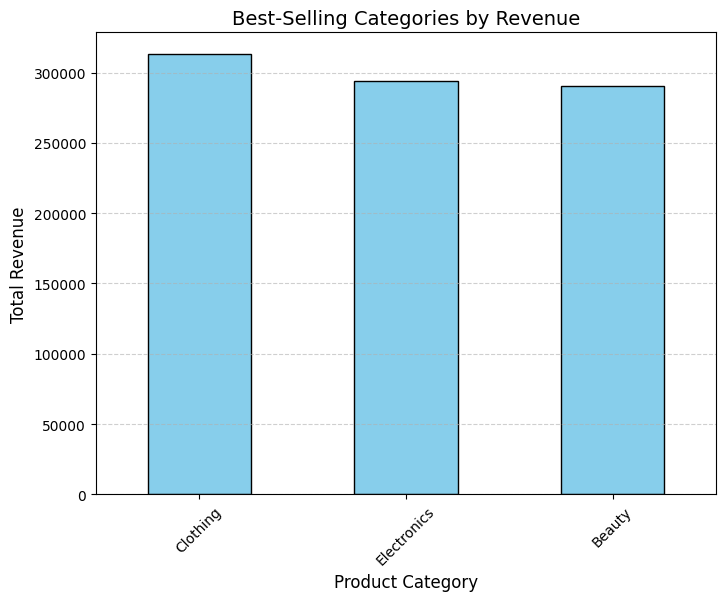

In [9]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

The clothing category has the highest revenue among the product categories.



---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

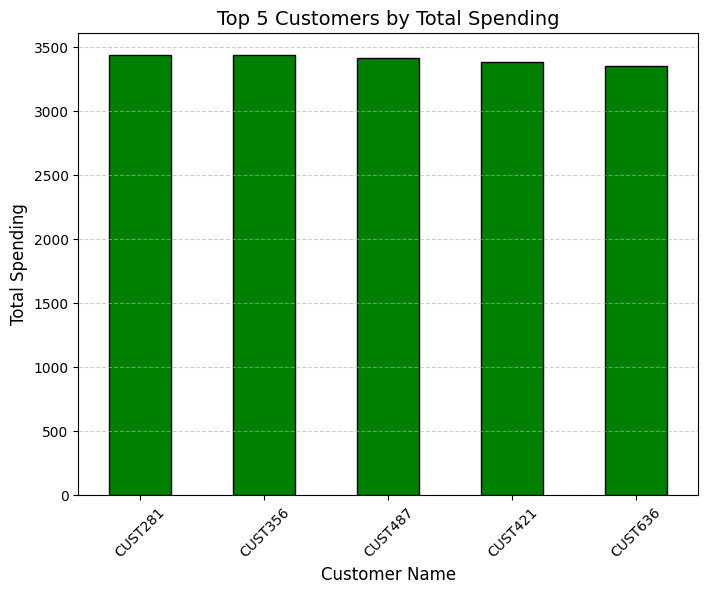

In [18]:
# Group by Customer and sum their total spending
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)

# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind='bar', color='green', edgecolor='black')

plt.title("Top 5 Customers by Total Spending", fontsize=14)
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

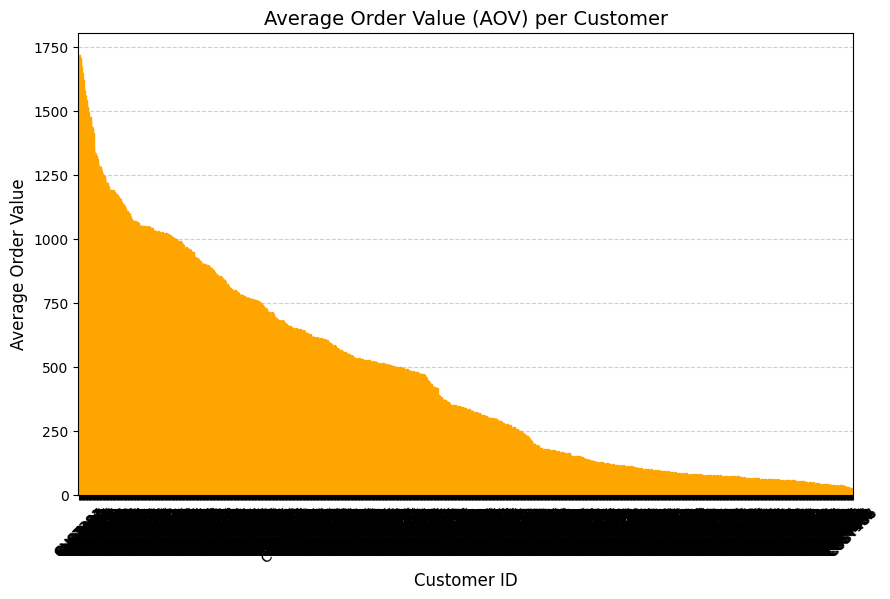

In [24]:
# Calculate average order value per customer
average_order_value = (
    df_sales.groupby('Customer ID')['Total Amount']
    .mean()
    .sort_values(ascending=False)
)

# Plot bar chart
plt.figure(figsize=(10,6))
average_order_value.plot(kind='bar', color='green', edgecolor='orange')

plt.title("Average Order Value (AOV) per Customer", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Average Order Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()






In [25]:

mean_aov = average_order_value.mean()
std_aov = average_order_value.std()
unusual_customers = average_order_value[average_order_value > mean_aov + 2*std_aov]
print("Customers with unusually high AOVs:")
print(unusual_customers)

Customers with unusually high AOVs:
Customer ID
CUST281    1719.24775
CUST356    1717.70120
CUST487    1706.08175
CUST421    1691.12975
CUST636    1676.31015
CUST805    1647.12850
CUST269    1622.44045
CUST202    1584.36610
CUST743    1580.52465
CUST142    1562.38335
CUST757    1542.49790
CUST072    1516.63695
CUST031    1508.42285
CUST684    1494.10065
CUST683    1477.30540
CUST117    1475.65305
CUST561    1462.21770
CUST447    1441.86160
CUST015    1438.68355
CUST054    1414.01615
CUST968    1363.17595
CUST067    1338.25960
CUST239    1335.00860
CUST013    1324.03390
CUST720    1310.03540
CUST233    1299.77255
CUST074    1289.05580
CUST524    1285.00350
CUST702    1282.07540
CUST290    1278.52285
CUST155    1270.48520
CUST987    1257.22340
CUST721    1249.48215
CUST539    1246.67035
CUST800    1239.67265
Name: Total Amount, dtype: float64




---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

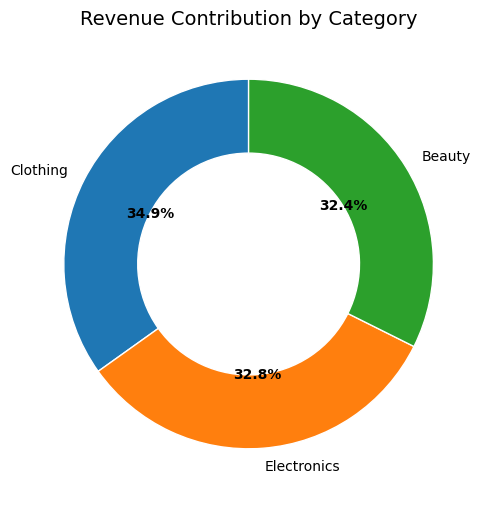

In [10]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

yes

Q. What else we could have come up with apart from donut chart to server the same purpose?

A Bar chart would suffice for the purpose as there are less categories and pie chart would also look good for comparision



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

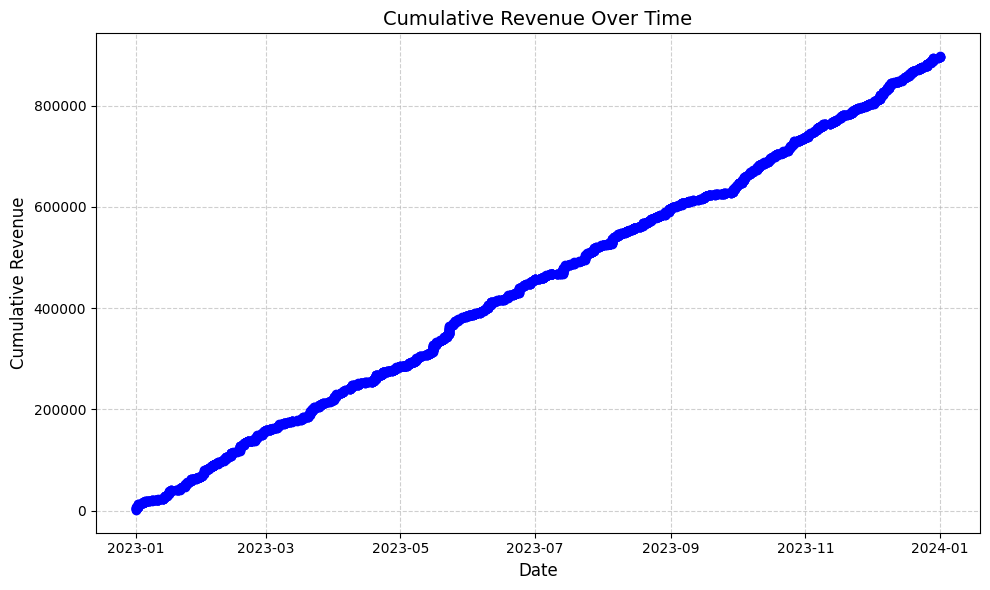

In [26]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Sort data by date
df_sales = df_sales.sort_values('Date')

# Calculate cumulative revenue
df_sales['Cumulative Revenue'] = df_sales['Total Amount'].cumsum()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(df_sales['Date'], df_sales['Cumulative Revenue'], color='blue', linewidth=2, marker='o')

plt.title("Cumulative Revenue Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.


The dataset below is a simple driver ride details dataset . This dataset was synthethically generated and contains various columns, like trip duration,trip distance etc.

In [27]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
file_path = '/content/customer_cancellation_balanced_dataset.csv'
data = pd.read_csv(file_path)
data

,trip_id,fare_amount,trip_duration,trip_distance,pickup_hour,day_of_week,weather_condition,payment_type,customer_rating,cancellation_probability
0,trip_1,51.63,96,32.22,4,4,Snowy,Wallet,1.13,1.00
1,trip_2,90.14,31,17.13,18,2,Clear,Card,2.65,0.00
2,trip_3,26.01,44,1.76,8,0,Rainy,Cash,3.33,0.00
3,trip_4,59.31,9,45.84,22,6,Snowy,Cash,4.46,0.00
4,trip_5,63.45,18,25.77,11,0,Clear,Cash,2.56,0.00
...,...,...,...,...,...,...,...,...,...,...
9995,trip_9996,46.91,51,43.95,19,4,Rainy,Card,3.78,0.21
9996,trip_9997,21.87,54,12.83,5,2,Clear,Wallet,2.07,0.17
9997,trip_9998,68.93,10,20.28,2,0,Snowy,Card,4.64,0.00
9998,trip_9999,67.54,110,29.54,20,2,Snowy,Cash,1.97,1.00


                          fare_amount  trip_duration  trip_distance  \
fare_amount                  1.000000       0.002501      -0.010297   
trip_duration                0.002501       1.000000      -0.015673   
trip_distance               -0.010297      -0.015673       1.000000   
pickup_hour                  0.010690      -0.008050      -0.002254   
day_of_week                  0.012483      -0.003942       0.009137   
customer_rating             -0.010632      -0.010130       0.024988   
cancellation_probability     0.026401       0.603664       0.334499   

                          pickup_hour  day_of_week  customer_rating  \
fare_amount                  0.010690     0.012483        -0.010632   
trip_duration               -0.008050    -0.003942        -0.010130   
trip_distance               -0.002254     0.009137         0.024988   
pickup_hour                  1.000000     0.003628         0.004277   
day_of_week                  0.003628     1.000000         0.004801   
custo

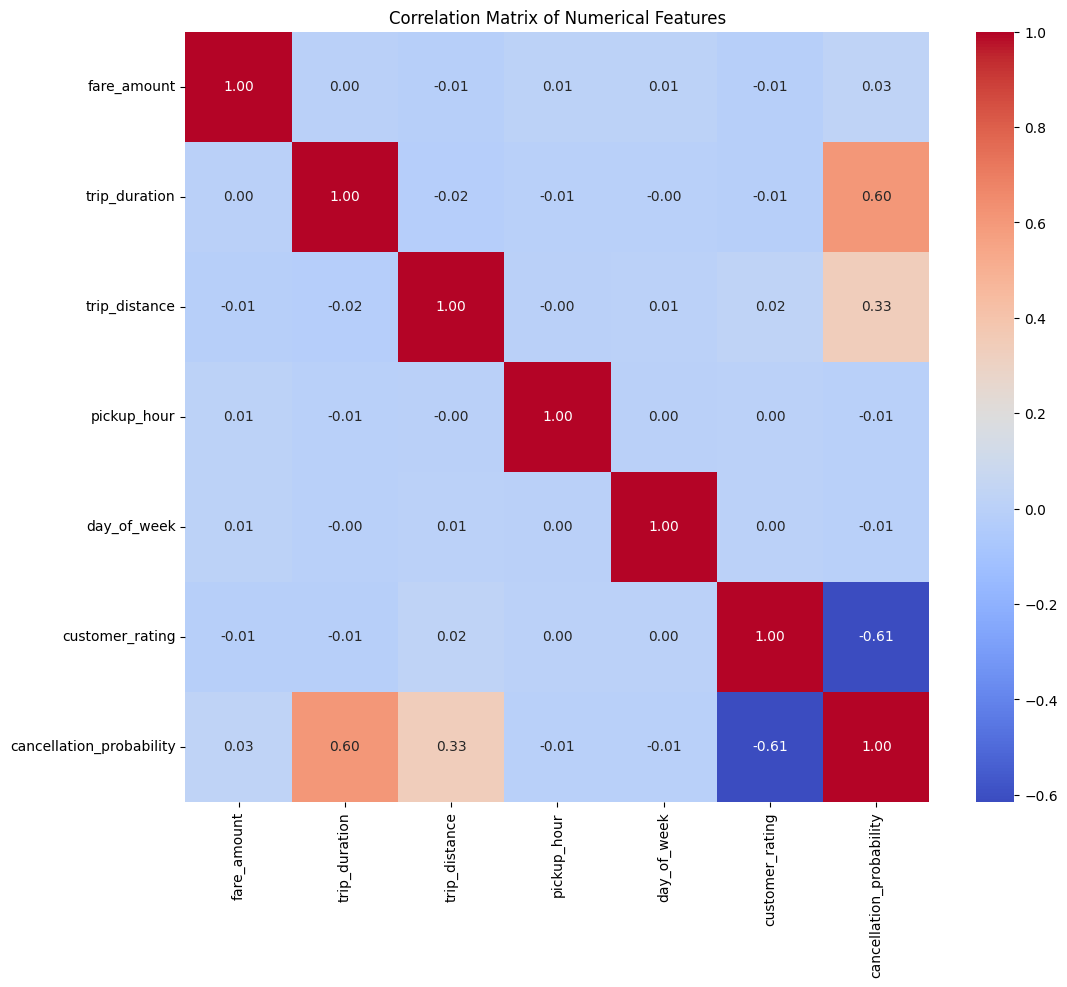

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Check if 'fare_amount' and 'trip_distance' exist in numeric data
if 'fare_amount' in numeric_data.columns and 'trip_distance' in numeric_data.columns:
    fare_distance_correlation = correlation_matrix.loc['fare_amount', 'trip_distance']
    print(f"\nCorrelation between fare_amount and trip_distance: {fare_distance_correlation}")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

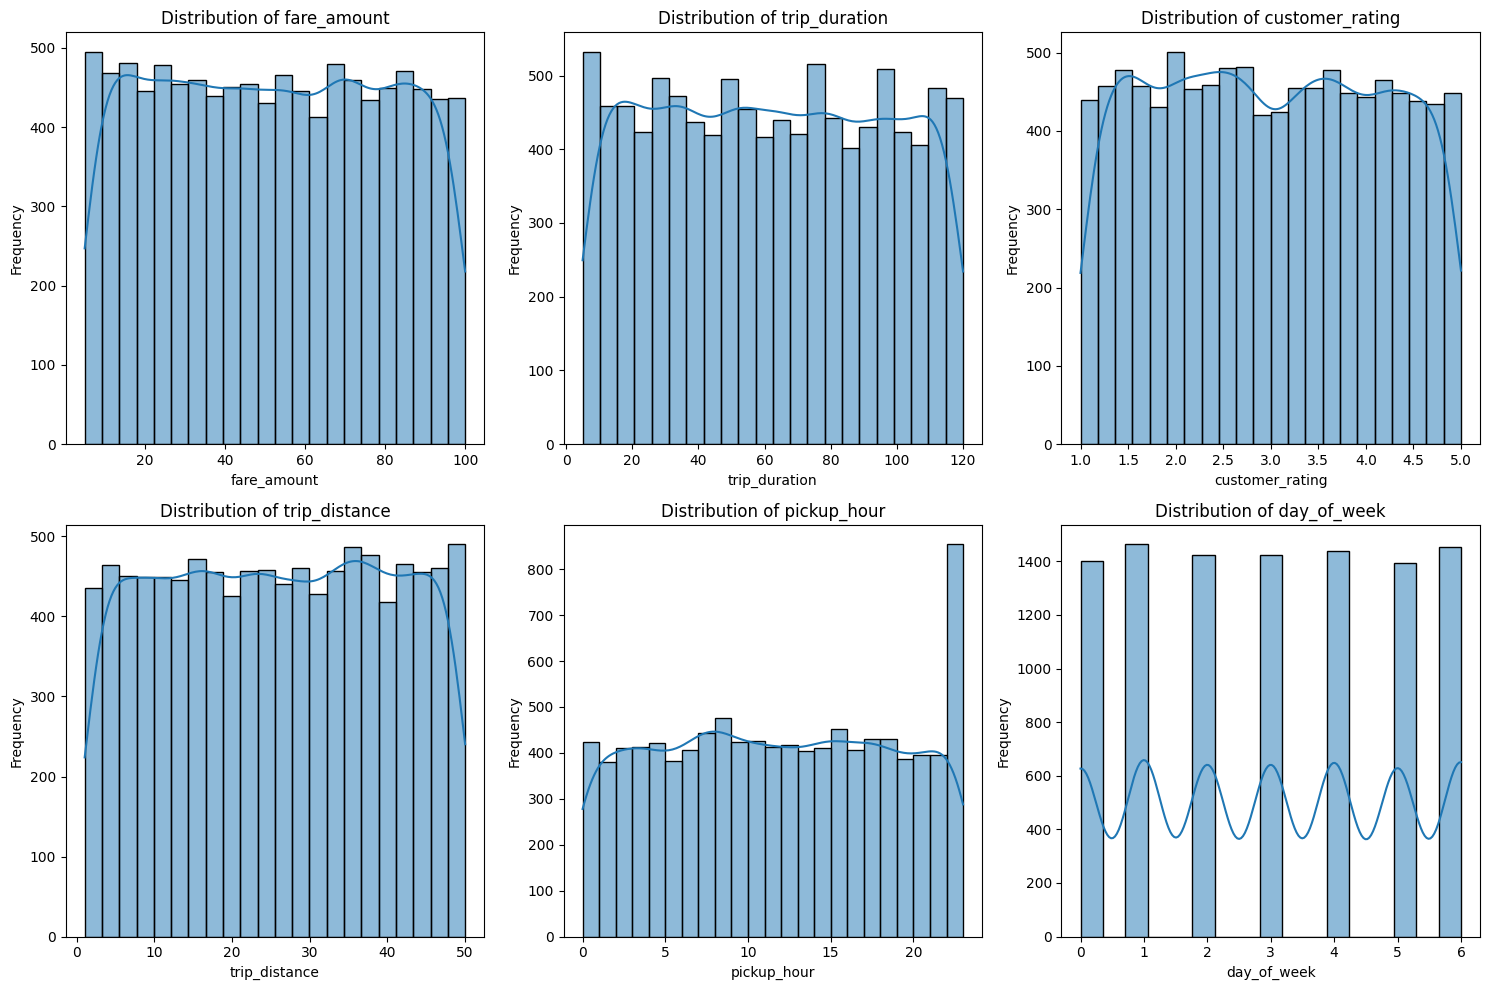

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
cols = ['fare_amount', 'trip_duration', 'customer_rating', 'trip_distance', 'pickup_hour', 'day_of_week']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the columns and plot histograms
for i, col in enumerate(cols):
    sns.histplot(data[col], ax=axes[i], kde=True)  # Use kde=True for kernel density estimation
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
if len(cols) < len(axes):
    for i in range(len(cols), len(axes)):
        fig.delaxes(axes[i])

# Adjust subplot spacing and display
fig.tight_layout()
plt.show()

In [31]:
# Define features and target
X = data.drop(columns=['trip_id', 'cancellation_probability'])
y = data['cancellation_probability']

# Identify categorical and numerical columns
categorical_columns = ['weather_condition', 'payment_type']
numerical_columns = ['fare_amount', 'trip_duration', 'trip_distance', 'pickup_hour', 'day_of_week', 'customer_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Define the model
model = RandomForestRegressor(random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model as a .pkl file
pkl_filename = "/content/drive/MyDrive/cancellation_model.pkl"
joblib.dump(pipeline, pkl_filename)

print(f"Model saved as {pkl_filename}")

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example: Predict cancellation probability for a new trip
new_trip = pd.DataFrame({
    'fare_amount': [50],
    'trip_duration': [30],
    'trip_distance': [10],
    'pickup_hour': [14],
    'day_of_week': [2],
    'weather_condition': ['Clear'],
    'payment_type': ['Card'],
    'customer_rating': [4.5]
})

predicted_probability = pipeline.predict(new_trip)
print(f"Predicted Cancellation Probability: {predicted_probability[0]}")

Model saved as /content/drive/MyDrive/cancellation_model.pkl
Mean Squared Error: 0.00137937683
R-squared: 0.9890411604270214
Predicted Cancellation Probability: 0.0


Mean Absolute Error (MAE): 0.025648900000000002
Mean Squared Error (MSE): 0.00137937683
Root Mean Squared Error (RMSE): 0.03713996270865118
R-squared (R²): 0.9890411604270214
Mean Absolute Percentage Error (MAPE): inf%


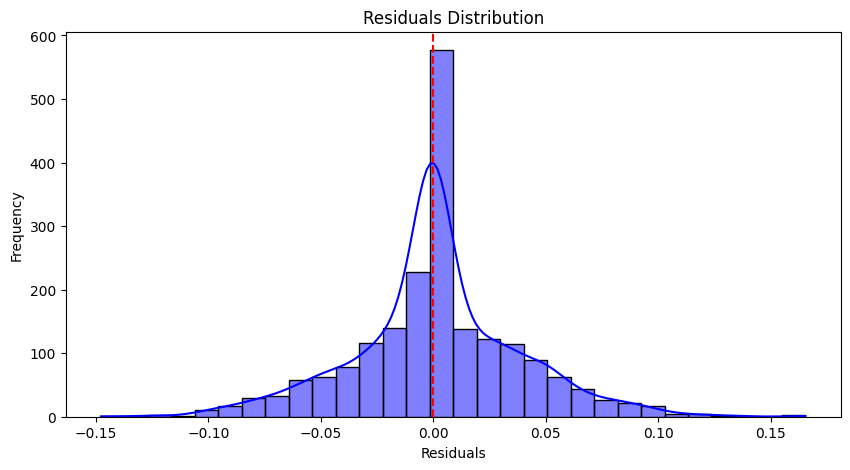

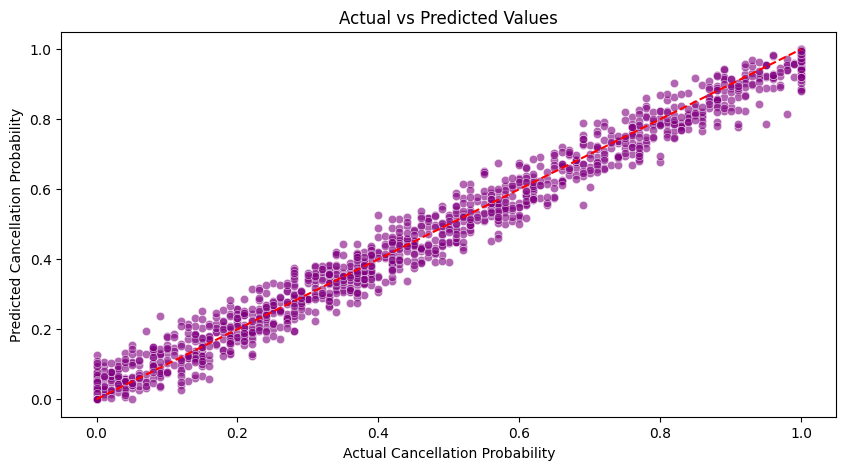

In [32]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the trained model
pkl_filename = "/content/drive/MyDrive/cancellation_model.pkl"
pipeline = joblib.load(pkl_filename)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 📊 Plot 1: Residuals Distribution
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.axvline(0, color='red', linestyle='dashed')
plt.show()

# 📊 Plot 2: Predicted vs. Actual Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # 45-degree line
plt.xlabel("Actual Cancellation Probability")
plt.ylabel("Predicted Cancellation Probability")
plt.title("Actual vs Predicted Values")
plt.show()

In [33]:
new_trip = pd.DataFrame({
    'fare_amount': [500],
    'trip_duration': [30],
    'trip_distance': [1],
    'pickup_hour': [14],
    'day_of_week': [2],
    'weather_condition': ['Clear'],
    'payment_type': ['Card'],
    'customer_rating': [1]
})
predicted_probability = pipeline.predict(new_trip)
print(f"Predicted Cancellation Probability: {predicted_probability[0]}")

Predicted Cancellation Probability: 0.17730000000000004
